# Starter Code for k-means Clustering and Feature Scaling Mini-Projects

In [1]:
import sys
import pickle

import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../utils/')

from feature_format import feature_format, target_feature_split

In [64]:
def draw(pred, features, poi, mark_poi=True, name='image.png', f1_name='feature 1', f2_name='feature 2'):
    """Some plotting code designed to help you visualize your clusters """

    # Plot each cluster with a different color--add more colors for
    # drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    # If you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

**Load in the dict of dicts containing all the data on each person in the dataset**

In [65]:
with open('../17-final-project/final_project_dataset_unix.pkl', 'rb') as f:
    data_dict = pickle.load(f)

**There's an outlier--remove it!**

In [66]:
data_dict.pop('TOTAL', 0)

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

The input features we want to use can be any key in the person-level dictionary (`salary`, `director_fees`, etc.)

In [67]:
feature_1 = 'salary'
feature_2 = 'exercised_stock_options'
feature_3 = "total_payments"
poi = 'poi'

features_list = [poi, feature_1, feature_2]
data = feature_format(data_dict, features_list)
poi, finance_features = target_feature_split(data)

In the "clustering with 3 features" part of the mini-project, you'll want to change this line to for 
```python
f1, f2, _ in finance_features:
```
as it's currently written, the line below assumes 2 features

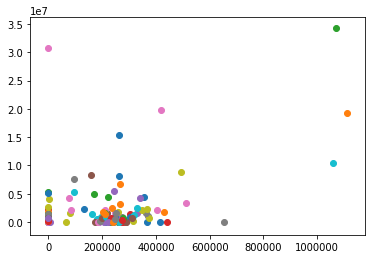

In [68]:
for f1, f2 in finance_features:
    plt.scatter(f1, f2)

plt.show()

## ↓↓↓ Your Code Goes Here ↓↓↓

Cluster here; create predictions of the cluster labels for the data and store them to a list called pred

In [69]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf.fit(data)
pred = clf.predict(data)

Rename the `name` parameter when you change the number of features so that the figure gets saved to a different file

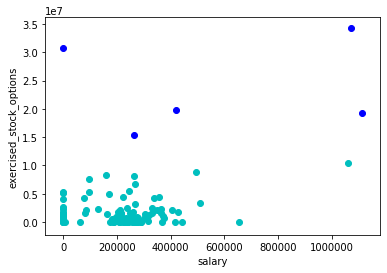

In [70]:
try:
    draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print('No predictions object named pred found, no clusters to plot')

In [53]:
# still learning how to work with dictionaries!
dict_vals = data_dict.values()
for v in dict_vals:
    print(v["salary"])
#     for k in v.keys():
        
    

365788
267102
170941
NaN
243293
267093
NaN
370448
374125
197091
130724
NaN
248546
257486
NaN
NaN
288542
251654
288558
63744
NaN
357091
271442
NaN
NaN
304110
NaN
187922
NaN
213625
249201
NaN
231330
NaN
182245
NaN
211788
NaN
NaN
NaN
224305
273746
339288
216582
210500
NaN
NaN
272880
477
NaN
269076
428780
211844
NaN
206121
174246
510364
365038
NaN
365163
162779
NaN
236457
NaN
1072321
261516
329078
NaN
184899
192008
NaN
262663
304588
NaN
NaN
278601
NaN
199157
NaN
96840
80818
213999
262788
210692
222093
440698
NaN
240189
420636
275101
NaN
314288
94941
NaN
239502
1111258
NaN
NaN
NaN
6615
NaN
288589
404338
NaN
259996
317543
NaN
201955
248146
NaN
NaN
NaN
263413
NaN
76399
655037
NaN
261809
248017
NaN
229284
231946
221003
158403
NaN
250100
492375
1060932
261879
NaN
239671
NaN
NaN
NaN
309946
NaN
85274
247338
349487
330546
NaN
415189
265214
278601
274975


In [50]:
# learn about exercised_stock_options feature
max = 1
min = 999999999999

for v in data_dict.values():
        if v["exercised_stock_options"] == "NaN":
            continue

        if int(v["exercised_stock_options"]) > max:
            max = int(v["exercised_stock_options"])    
        
        if int(v["exercised_stock_options"]) < min:
            min = int(v["exercised_stock_options"])
        else:
            continue
    
    
#     for vv in v.values():
#         print("v[\"exercised_stock_options\"]:", v["exercised_stock_options"])
        

print("max:", max)
print("min:", min)

max: 34348384
min: 3285


In [58]:
# learn about salary feature
max_sal = 1
min_sal = 999999999999

for v in data_dict.values():
#     print(v["salary"])
    
    if v["salary"] == "NaN":
        continue

    if int(v["salary"]) > max_sal:
        max_sal = int(v["salary"])
        print("max_sal is now", max_sal)

    if int(v["salary"]) < min_sal:
        min_sal = int(v["salary"])
    else:
        continue

    
#     for vv in v.values():
#         print("v[\"exercised_stock_options\"]:", v["exercised_stock_options"])
        

print("max:", max_sal)
print("min:", min_sal)

max_sal is now 365788
max_sal is now 370448
max_sal is now 374125
max_sal is now 428780
max_sal is now 510364
max_sal is now 1072321
max_sal is now 1111258
max: 1111258
min: 477


In [88]:
# now exploring feature rescaling on the data
feature_1 = 'salary'
feature_2 = 'exercised_stock_options'
feature_3 = "total_payments"
poi = 'poi'

features_list = [feature_1, feature_2]
data = feature_format(data_dict, features_list)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_features = scaler.fit_transform(data)
poi, finance_features = target_feature_split(new_features)

In [90]:
# calculate rescaled values for $200,000 salary and $1,000,000 exercised_stock_options
scaler2 = MinMaxScaler()
scaler2.fit(data)
# print(scaler2.transform(data))

print(scaler2.transform([[200000., 1000000.]]))


[[0.17997621 0.02911345]]


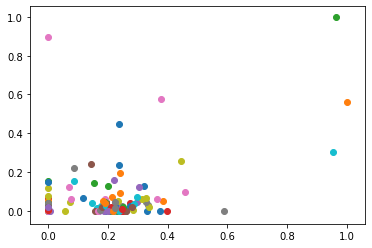

In [75]:
for f1, f2 in finance_features:
    plt.scatter(f1, f2)

plt.show()

In [76]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf.fit(data)
pred = clf.predict(data)

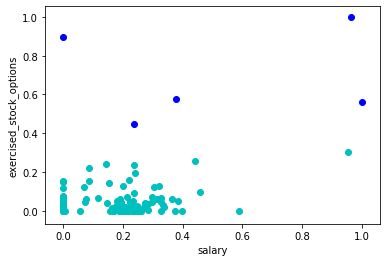

In [77]:
try:
    draw(pred, finance_features, poi, mark_poi=False, name="rescaled_clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print('No predictions object named pred found, no clusters to plot')